In [38]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [39]:
df = pd.read_csv("/content/50_Startups.csv")

In [40]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [41]:
df.isna().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [42]:
df.dtypes

,0
R&D Spend,float64
Administration,float64
Marketing Spend,float64
State,object
Profit,float64


In [43]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


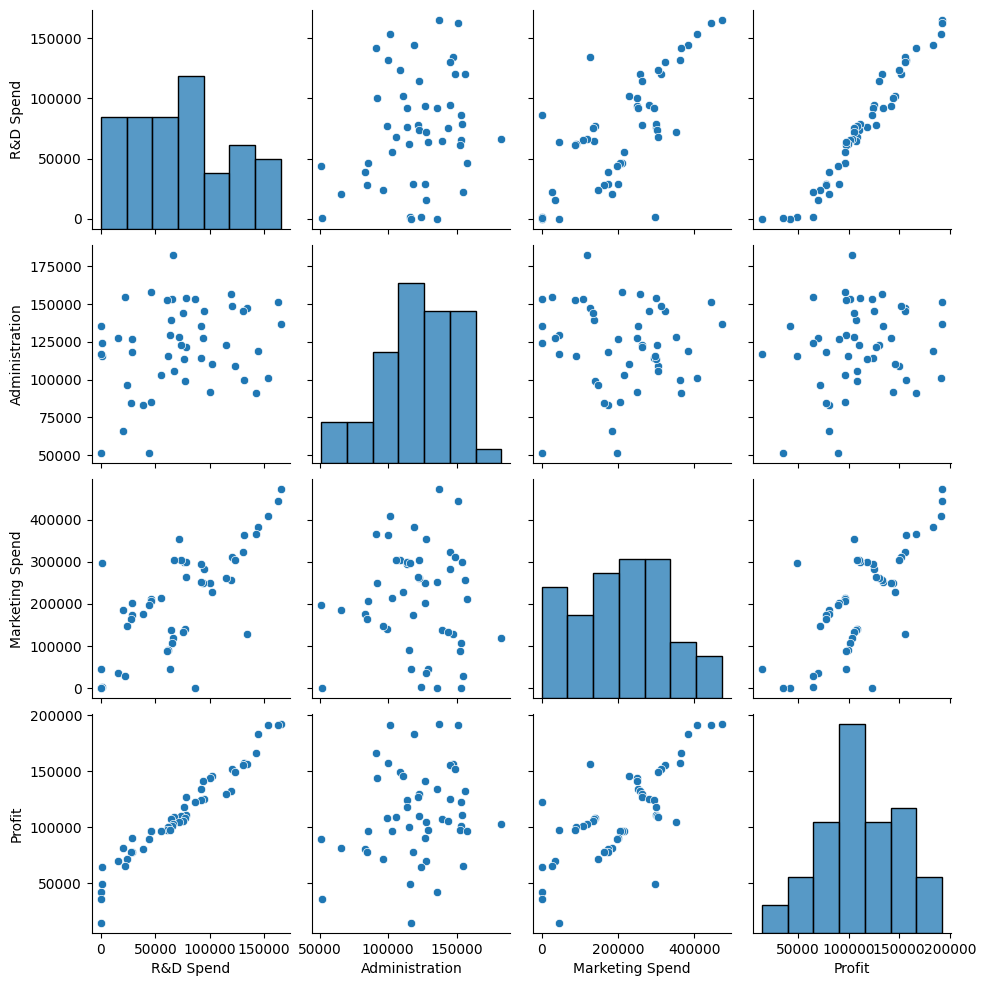

In [44]:
import seaborn as sns
sns.pairplot(df)

In [45]:
# prompt: convert state in df into 0,1,2 values

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['State'] = le.fit_transform(df['State'])
print(df.head())

   R&D Spend  Administration  Marketing Spend  State     Profit
0  165349.20       136897.80        471784.10      2  192261.83
1  162597.70       151377.59        443898.53      0  191792.06
2  153441.51       101145.55        407934.54      1  191050.39
3  144372.41       118671.85        383199.62      2  182901.99
4  142107.34        91391.77        366168.42      1  166187.94


Here the new converted state attribute has 3 diff labels they are  0 is california , 1 is florida , 2 is New york

First we are going to contruct seperate linear regressions models to predict profit in which we use one attribute to predict the target

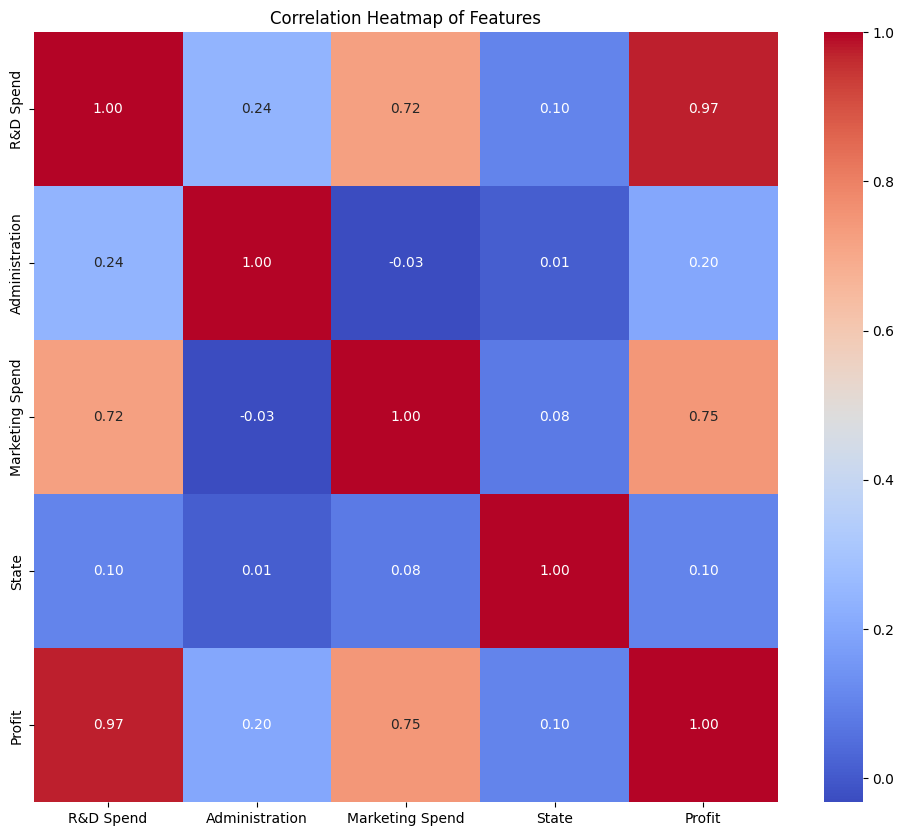

In [46]:
# prompt: generate correlation heat map

# Assuming 'df' is already defined and preprocessed as in the provided code.

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

From this we can say that R&D changes is strongly linked to changes in profit , hence for linear regression its best to choose R&D as independent variable and for predicting DV - profit

In [47]:
X = df[['R&D Spend']]
y = df['Profit']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
lr = LinearRegression()

In [50]:
lr.fit(X_train.values,y_train)

LinearRegression()

In [51]:
y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [52]:
r2_score( y_test, y_pred)

0.9265108109341951

About 92.7% of the changes in profit is explained by the IDV - R&D spend

In [53]:
print(lr.intercept_)

49336.6680379911


In [54]:
lr.predict(X[0:1])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([190480.25107829])

In [55]:
type(lr)

sklearn.linear_model._base.LinearRegression

In [56]:
import pickle

In [57]:
# save
with open('model.pkl','wb') as f:
    pickle.dump(lr,f)

In [58]:
# load
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

In [59]:
X[0:5]

,R&D Spend
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [60]:
clf2.predict(X[0:5])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([190480.25107829, 188131.54561896, 180315.73844483, 172574.27208786,
       170640.7877067 ])

In [61]:
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

       Actual      Predicted
13  134307.35  127862.209964
39   81005.76   82250.563346
30   99937.59  102255.720782
45   64926.08   50190.473476
17  125370.37  130136.881905


We see that the linear regression model predicts the value fairly accurately with deviation about 5% or lesser for most of the prediction

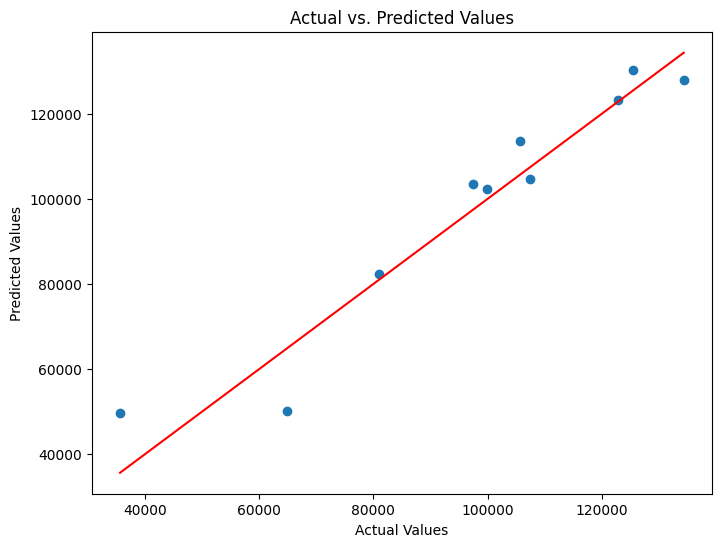

In [62]:
# prompt: plot a scatter plot between predicted and actual values

import matplotlib.pyplot as plt

# Assuming 'predictions' DataFrame is already created as in the previous code.

plt.figure(figsize=(8, 6))
plt.scatter(predictions['Actual'], predictions['Predicted'])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([min(predictions['Actual']), max(predictions['Actual'])], [min(predictions['Actual']), max(predictions['Actual'])], color='red')  # Add a diagonal line
plt.show()

The actual and predicted values are almost linear , hence this is a fairly decent model for predicting the profit

Multiple regression

In [63]:
X1 = df.drop(columns=['Profit'])
y1 = df['Profit']

In [64]:
print("Shape of X1:", X1.shape)
print("Shape of y1:", y1.shape)

Shape of X1: (50, 4)
Shape of y1: (50,)


In [65]:
X1 = X1.values
y1 = y1.values

In [66]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [67]:
print("Shape of X1:", X1_train.shape)
print("Shape of y1:", y1_train.shape)

Shape of X1: (40, 4)
Shape of y1: (40,)


80% of the train data i.e 40 datas out of the 50 are taken for trainning due to text split being 20% i,.e 10 datas out 0f 50

In [68]:
# =======================================
# Multiple Linear Regression
# =======================================
from sklearn.metrics import mean_squared_error, r2_score
model_multiple = LinearRegression()

# Train the model
model_multiple.fit(X1_train, y1_train)

y1_pred_multiple = model_multiple.predict(X1_test)

mse_multiple = mean_squared_error(y1_test, y1_pred_multiple)
r2_multiple = r2_score(y1_test, y1_pred_multiple)

print("\nMultiple Linear Regression")
print(f"  Mean Squared Error: {mse_multiple:.4f}")
print(f"  R² Score: {r2_multiple:.4f}")


Multiple Linear Regression
  Mean Squared Error: 80929465.4910
  R² Score: 0.9001


About 90% changes in target variable profit can be explained by the 4 IDVs

In [69]:
print(model_multiple.intercept_)

54080.71684611377


In [70]:
type(model_multiple)

sklearn.linear_model._base.LinearRegression

In [72]:
model_multiple.predict(X1[0:5])

array([192405.36723938, 188372.32164914, 183282.8185662 , 174012.86095334,
       173529.22121764])

In [73]:
import pandas as pd
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_multiple})
print(predictions.head())

       Actual      Predicted
13  134307.35  126720.661507
39   81005.76   84909.089619
30   99937.59   98890.318549
45   64926.08   46479.312402
17  125370.37  129113.183188


For some values the deviation between predicted and actual values is lesser compared to the linear regression model but for some the deviation is also higher

In [75]:
X2 = df.drop(columns=['Profit', 'State', 'Administration'])
y2 = df['Profit']
print("Shape of X2:", X2.shape)
print("Shape of y2:", y2.shape)
X2 = X2.values
y2 = y2.values
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
print("Shape of X2:", X2_train.shape)
print("Shape of y2:", y2_train.shape)

Shape of X2: (50, 2)
Shape of y2: (50,)
Shape of X2: (40, 2)
Shape of y2: (40,)


In [77]:
# =======================================
# Multiple Linear Regression 2
# =======================================

model_multiple = LinearRegression()

# Train the model
model_multiple.fit(X2_train, y2_train)

y2_pred_multiple = model_multiple.predict(X2_test)

mse_multiple = mean_squared_error(y2_test, y2_pred_multiple)
r2_multiple = r2_score(y2_test, y2_pred_multiple)

print("\nMultiple Linear Regression 2")
print(f"  Mean Squared Error: {mse_multiple:.4f}")
print(f"  R² Score: {r2_multiple:.4f}")


Multiple Linear Regression 2
  Mean Squared Error: 67343832.5898
  R² Score: 0.9168


This multiple regression model has lesser mean squarev error and higher R2 score but still falls short of the explaintary power of linear regression model whose r2 score > 92%

Based on the 3 models created , we can say that the linear regession model is the best one for accurate prediction followed by multiple regression model 2 , then multiple regression model 1